In [1]:
import pandas as pd

# Load datasets
df_challenge = pd.read_csv("ds_challenge_v2_1_data.csv")
df_vehicles = pd.read_csv("vehicles.csv")

# Step 1: Clean and prep the vehicle dataset
df_vehicles['make_clean'] = df_vehicles['make'].astype(str).str.lower().str.strip()
df_vehicles['model_clean'] = df_vehicles['model'].astype(str).str.lower().str.strip()

# Keep only relevant columns and drop duplicates by averaging MPG
mpg_df = df_vehicles[['make_clean', 'model_clean', 'year', 'comb08', 'fuelType1']].copy()
mpg_df = mpg_df.groupby(['make_clean', 'model_clean', 'year'], as_index=False).agg({
    'comb08': 'mean',
    'fuelType1': lambda x: 'electricity' if any('electric' in str(v).lower() for v in x) else 'gas'
})

mpg_df['is_electric'] = mpg_df['fuelType1'].str.lower().str.contains('electric')
mpg_df.drop(columns='fuelType1', inplace=True)

# Step 2: Clean the challenge dataset
df_challenge['vehicle_make_clean'] = df_challenge['vehicle_make'].astype(str).str.lower().str.strip()
df_challenge['vehicle_model_clean'] = df_challenge['vehicle_model'].astype(str).str.lower().str.strip()
df_challenge['vehicle_year'] = df_challenge['vehicle_year'].fillna(-1).astype(int)

# Step 3: Merge
df_merged = pd.merge(
    df_challenge,
    mpg_df,
    how='left',
    left_on=['vehicle_make_clean', 'vehicle_model_clean', 'vehicle_year'],
    right_on=['make_clean', 'model_clean', 'year']
)

# Step 4: Finalize columns
df_merged['vehicle_mpg'] = df_merged['comb08'].fillna(-1)
df_merged['is_electric'] = df_merged['is_electric'].fillna(False)
df_merged['average_gas_cost_per_gallon'] = 3.50

# Drop merge helper columns
df_merged.drop(columns=['make_clean', 'model_clean', 'year', 'comb08', 'is_electric', 'average_gas_cost_per_gallon'], inplace=True)


/tmp/ipykernel_93/888292915.py:5: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicles = pd.read_csv("vehicles.csv")


In [3]:
print(len(df_merged))
print(len(df_challenge))

54681
54681


In [25]:
df_merged.head(50)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,...,vehicle_age,bgc_completed,vehicle_uploaded,has_vehicle,signup_weekend,city_name_encoded,signup_os_encoded,signup_channel_encoded,vehicle_make_encoded,vehicle_model_encoded
0,1,1,2,1,2016-01-02,NaT,NaT,43,325,-1,...,2017,0,0,1,1,1,2,1,43,325
1,2,1,5,1,2016-01-21,NaT,NaT,43,325,-1,...,2017,0,0,1,0,1,5,1,43,325
2,3,2,5,0,2016-01-11,2016-01-11,NaT,43,325,-1,...,2017,1,0,1,0,2,5,0,43,325
3,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79
4,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79
5,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79
6,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79
7,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79
8,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79
9,4,0,1,2,2016-01-29,2016-02-03,2016-02-03,42,79,2016,...,0,1,1,1,0,0,1,2,42,79


/tmp/ipykernel_93/2619485562.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipykernel_93/2619485562.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipykernel_93/2619485562.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      9704
           1       0.69      0.72      0.71     

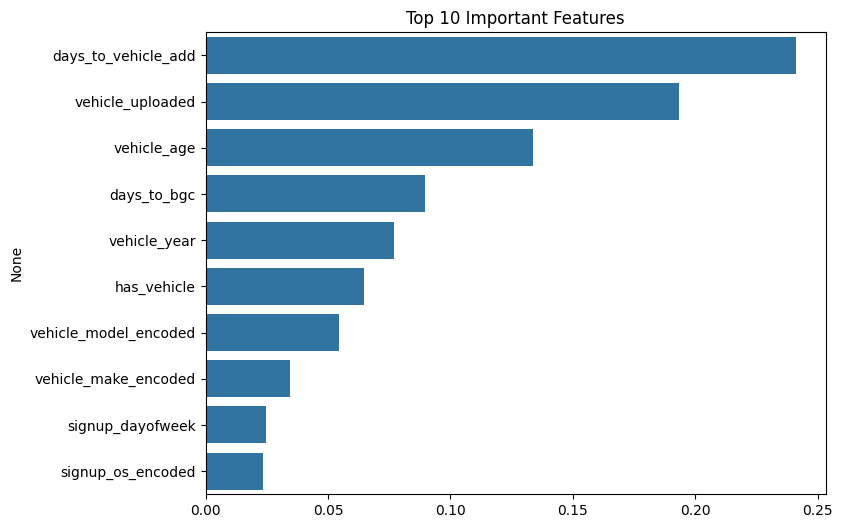

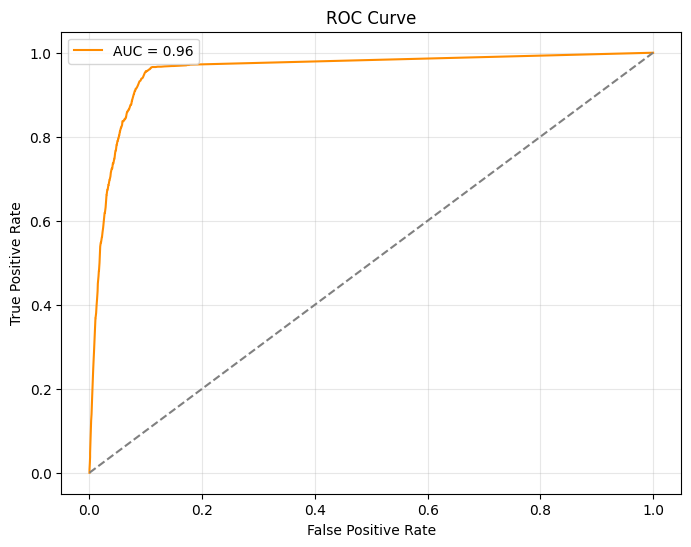

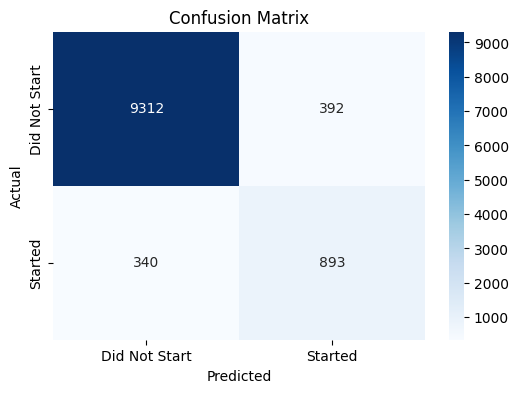

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from datetime import datetime

# ------------------------------
# Step 1: Prepare and Clean Data
# ------------------------------
df = df_merged.copy()
df['started_driving'] = df['first_completed_date'].notnull().astype(int)

# Convert to datetime
for col in ['signup_date', 'bgc_date', 'vehicle_added_date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Feature engineering
df['days_to_bgc'] = (df['bgc_date'] - df['signup_date']).dt.days.fillna(-1)
df['days_to_vehicle_add'] = (df['vehicle_added_date'] - df['signup_date']).dt.days.fillna(-1)
df['signup_dayofweek'] = df['signup_date'].dt.dayofweek
df['signup_month'] = df['signup_date'].dt.month
df['vehicle_year'] = df['vehicle_year'].fillna(-1)
df['vehicle_age'] = df['signup_date'].dt.year - df['vehicle_year']
df['bgc_completed'] = df['bgc_date'].notnull().astype(int)
df['vehicle_uploaded'] = df['vehicle_added_date'].notnull().astype(int)
df['has_vehicle'] = df['vehicle_make'].fillna('Unknown') != 'Unknown'
df['signup_weekend'] = (df['signup_date'].dt.dayofweek >= 5).astype(int)

# Fill missing categoricals
for col in ['signup_os', 'vehicle_make', 'vehicle_model']:
    df[col] = df[col].fillna('Unknown')

# Label encode
categorical_cols = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = encoder.fit_transform(df[col])

# --------------------------------
# Step 2: Select Features & Target
# --------------------------------
features = df.drop(columns=[
    'id', 'first_completed_date', 'started_driving',
    'signup_date', 'bgc_date', 'vehicle_added_date',
    'vehicle_make', 'vehicle_model',
    'vehicle_make_clean', 'vehicle_model_clean',
    'city_name', 'signup_os', 'signup_channel'
])
X = features
y = df['started_driving']

# ------------------------------
# Step 3: Handle Missing Values
# ------------------------------
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].fillna(False)
    elif X[col].dtype in ['float64', 'int64']:
        X[col] = X[col].fillna(-1)
    else:
        X[col] = X[col].fillna('Unknown')

# ------------------------
# Step 4: Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# Step 5: Train the Model
# -----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# -----------------------
# Step 6: Evaluation
# -----------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# ------------------------
# Step 7: Feature Importance
# ------------------------
importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()

# ----------------------
# Step 8: ROC Curve
# ----------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# Step 9: Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Start', 'Started'],
            yticklabels=['Did Not Start', 'Started'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [07:09:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      9704
           1       0.72      0.76      0.74      1233

    accuracy                           0.94     10937
   macro avg       0.85      0.86      0.85     10937
weighted avg       0.94      0.94      0.94     10937

XGBoost ROC AUC: 0.9683506487905758


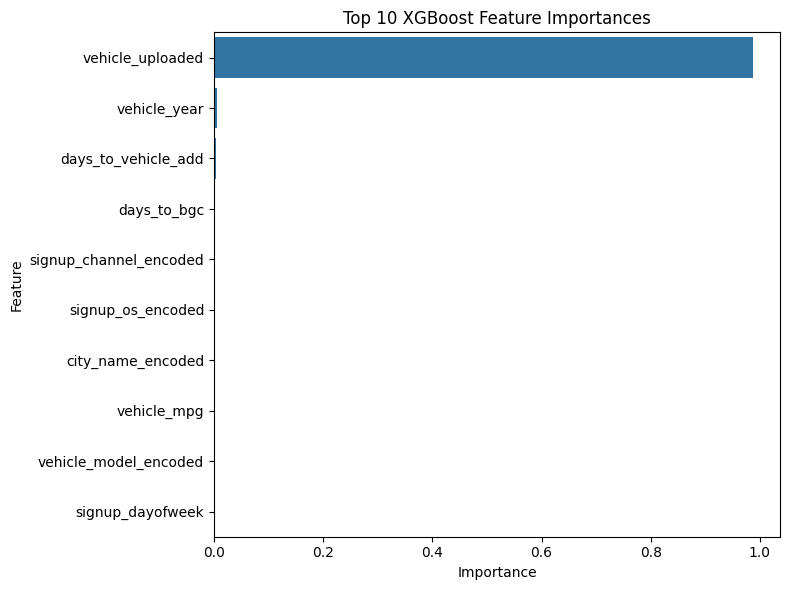

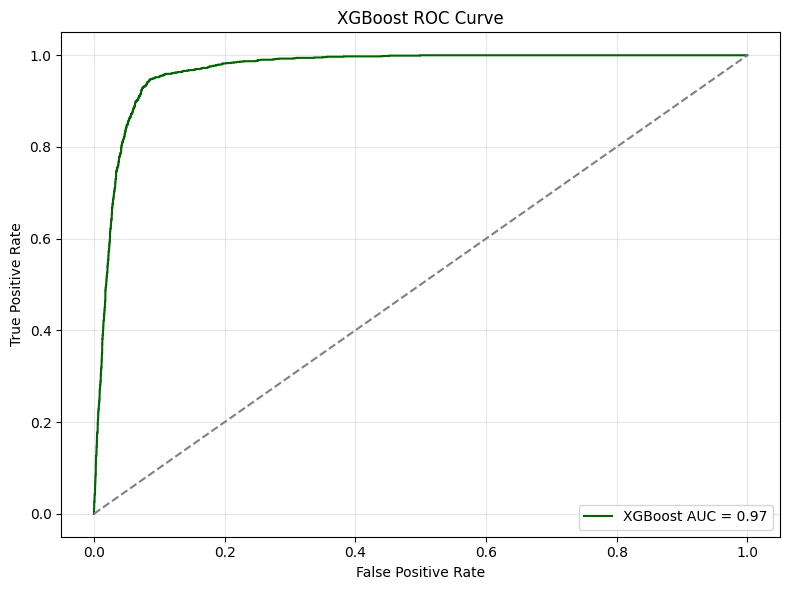

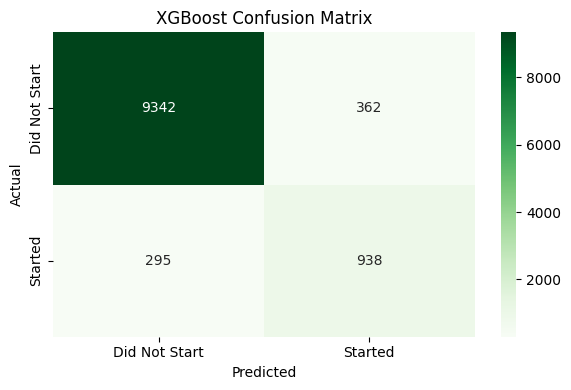

In [7]:
import xgboost as xgb

# -----------------------
# Step 5: Train the XGBoost Model
# -----------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    class_weight='balanced'
)
xgb_model.fit(X_train, y_train)

# -----------------------
# Step 6: Evaluation
# -----------------------
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

# ------------------------
# Step 7: Feature Importance (Top 10)
# ------------------------
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_top_features = xgb_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=xgb_top_features.values, y=xgb_top_features.index)
plt.title("Top 10 XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ----------------------
# Step 8: ROC Curve
# ----------------------
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {roc_auc_xgb:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------
# Step 9: Confusion Matrix
# --------------------------
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Start', 'Started'],
            yticklabels=['Did Not Start', 'Started'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()


/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      9704
           1       0.72      0.76      0.74      1233

    accuracy                           0.94     10937
   macro avg       0.84      0.86      0.85     10937
weighted avg       0.94      0.94      0.94     10937

Logistic Regression ROC AUC: 0.9650538335375951


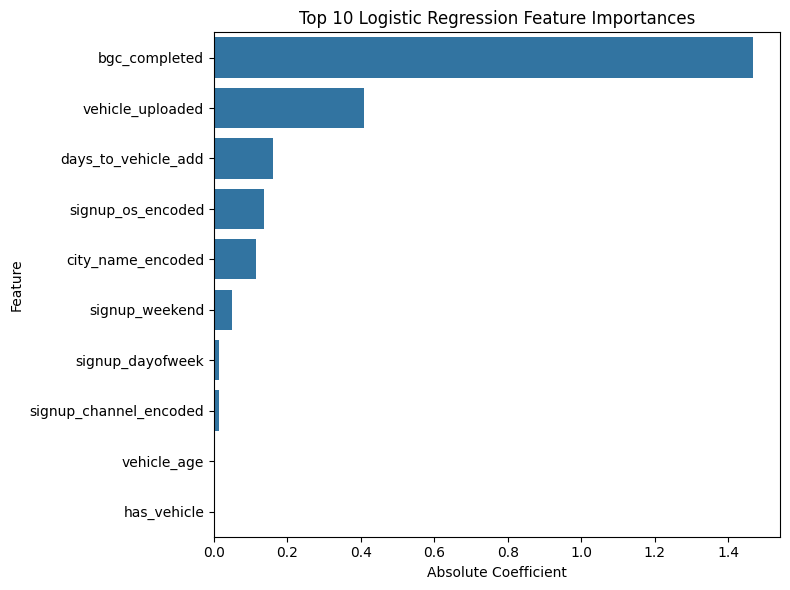

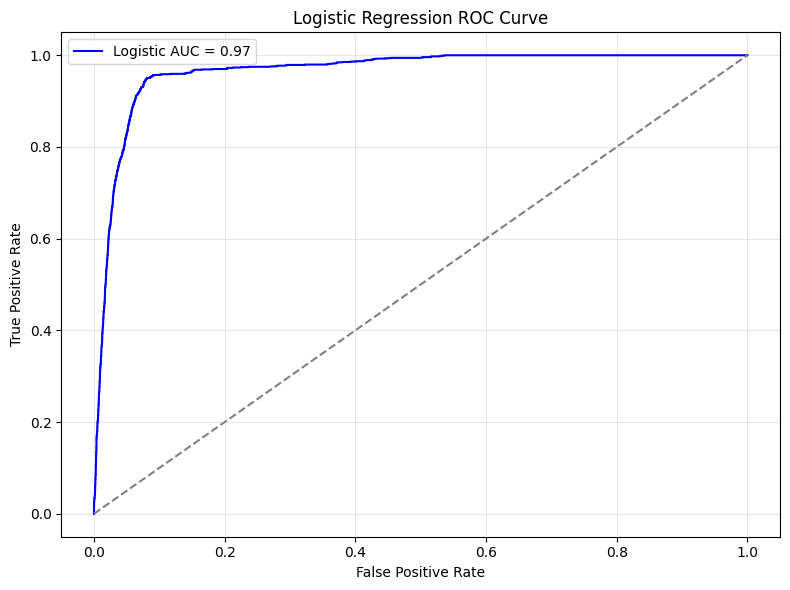

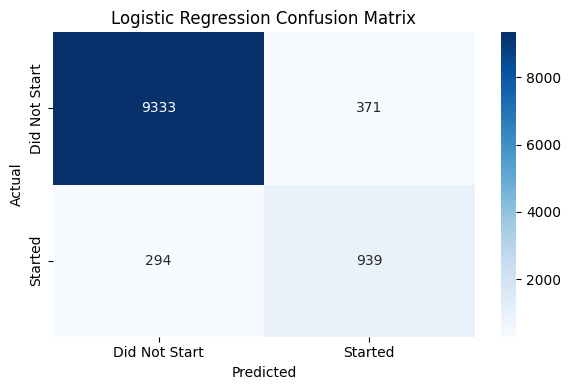

In [63]:
from sklearn.linear_model import LogisticRegression

# -----------------------
# Step 5: Train the Logistic Regression Model
# -----------------------
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# -----------------------
# Step 6: Evaluation
# -----------------------
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba_lr))

# ------------------------
# Step 7: Feature Importance (Top 10 by Absolute Coefficient)
# ------------------------
lr_importances = pd.Series(lr_model.coef_[0], index=X_train.columns)
lr_top_features = lr_importances.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=lr_top_features.values, y=lr_top_features.index)
plt.title("Top 10 Logistic Regression Feature Importances")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ----------------------
# Step 8: ROC Curve
# ----------------------
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic AUC = {roc_auc_lr:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------
# Step 9: Confusion Matrix
# --------------------------
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Start', 'Started'],
            yticklabels=['Did Not Start', 'Started'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
plt.show()


In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=5000, C=10, penalty='l2', solver='lbfgs')
rf_model = RandomForestClassifier(n_estimators=382, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    colsample_bytree=1.0,  # Fixed syntax here
    learning_rate=0.1,     # Fixed syntax here
    max_depth=3, 
    n_estimators=100, 
    subsample=0.7, 
    random_state=42
)

ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', log_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # 'soft' uses predicted probabilities, generally better
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
y_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_ensemble))
print("Ensemble ROC AUC:", roc_auc_score(y_test, y_proba_ensemble))
# Compute confusion matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Start', 'Started'],
            yticklabels=['Did Not Start', 'Started'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting Ensemble Confusion Matrix')
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Ensemble AUC = {roc_auc_lr:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'X_train' is not defined

In [3]:
# Boxplot: MPG vs driver outcome
plt.figure(figsize=(8, 5))
sns.boxplot(x='started_driving', y='vehicle_mpg', data=df_merged)
plt.title("Vehicle MPG vs Driver Start Outcome")
plt.xticks([0, 1], ['Did Not Start', 'Started Driving'])
plt.xlabel("Started Driving")
plt.ylabel("Vehicle MPG")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined